In [1]:
import matplotlib.pyplot as plt
import sys
from glob import glob
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
import numpy as np
import seaborn as sns

In [3]:
params = {'legend.fontsize':'x-large','font.size':10,'axes.labelsize': 'xx-large','xtick.labelsize':'xx-large','ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')


def get_lattice(ufilename): 
    '''return lattice (k_max) from header''' 
    with open(ufilename) as readfile: 
        ulines = readfile.readlines() 
     
    target_parameter    = 'LATTICE' 
 
    for line in ulines: 
         
        try: 
            parameter   = line.split()[1] 
            value       = line.split()[2] 
        except: 
            print("spc file not formatted correctly in line {}".format(ulines.index(line))) 
            exit(1) 
         
        if parameter == target_parameter: 
            lattice = int(value) #why not integer? 
                        #there was a good reason I can't recall 
        elif parameter == 'Plot': 
            break 
 
    return lattice 

def get_viscosity(ufilename): 
    '''return viscosity from header''' 
    with open(ufilename) as readfile: 
        ulines = readfile.readlines() 
     
    target_parameter    = 'VISC' 
 
    for line in ulines: 
         
        try: 
            parameter   = line.split()[1] 
            value       = line.split()[2] 
        except: 
            print("spc file not formatted correctly in line {}".format(ulines.index(line))) 
            exit(1) 
         
        if parameter == target_parameter: 
            viscosity = float(value) #why not integer? 
                        #there was a good reason I can't recall 
        elif parameter == 'Plot': 
            break 
 
    return viscosity 

def get_prandtl(ufilename): 
    '''return prandtl from header''' 
    with open(ufilename) as readfile: 
        ulines = readfile.readlines() 
     
    target_parameter    = 'PRANDTL' 
 
    for line in ulines: 
         
        try: 
            parameter   = line.split()[1] 
            value       = line.split()[2] 
        except: 
            print("spc file not formatted correctly in line {}".format(ulines.index(line))) 
            exit(1) 
         
        if parameter == target_parameter: 
            Pm = float(value) #why not integer? 
                        #there was a good reason I can't recall 
        elif parameter == 'Plot': 
            break 
 
    return Pm 



def get_dt(ufilename):
    '''return time interval of the output (not dt of the simulation) from header'''
    with open(ufilename) as readfile:
        ulines = readfile.readlines()

    target_parameter = 'INTERVAL'


    for line in ulines:

        try:
            parameter   = line.split()[1]
            value       = line.split()[2]
        except:
            print("spc file not formatted correctly in \
line {}".format(ulines.index(line)))
            exit(1)

        if parameter == target_parameter:
            dt = float(value)
        elif parameter == 'Plot':
            break

    return dt


def get_initial_time(ufilename):
    '''return initial time of spc file'''
    if '.stats' in ufilename:
        ufilename = ufilename.replace('stats','spc')
    with open(ufilename) as readfile:
        ulines = readfile.readlines()
    init_time = -1
    spectra_block_check = 'asd'
    for line in ulines:
        line_data = line.split()

        try:
            spectra_block_check = line_data[1]
        except:
            pass

        if spectra_block_check == "Plot":
            init_time = float(line_data[-1])

        if init_time != -1:
            break

    return init_time


def get_final_time(ufilename):
    '''return final time of spc file'''
    if '.stats' in ufilename:
        ufilename = ufilename.replace('stats','spc')
    with open(ufilename) as readfile:
        ulines = readfile.readlines()
    final_time = -1
    ulines.reverse()
    spectra_block_check = 'asd'
    for line in ulines:
        line_data = line.split()

        try:
            spectra_block_check = line_data[1]
        except:
            pass

        if spectra_block_check == "Plot":
            final_time = float(line_data[-1])

        if final_time != -1:
            break

    return final_time


def B_spectrum(ufilename):
    '''gets array with mag energy spectrum in time'''

    readfile = open(ufilename)
    ulines = readfile.readlines()

    for line in ulines:
        line_data = line.split('\t')
        for data in line_data:
            if 'Eb(k)' in data:
                idx = line_data.index(data)
    readfile = open(ufilename)

    init_time   = get_initial_time(ufilename)
    final_time  = get_final_time(ufilename)
    total_time  = final_time - init_time
    dt = get_dt(ufilename)
    n_steps     = int(total_time/dt) 
    k_max = int(get_lattice(ufilename)/3) -1
    spec_columns = np.loadtxt(readfile,usecols=idx)
    spectrums   = np.empty((0,k_max))
    for i in range(n_steps):
        idx_start   = i * k_max
        idx_end     = (i+1) * k_max
        spectrum    = spec_columns[idx_start:idx_end]
        spectrums   =  np.vstack((spectrums,spectrum))
    return spectrums


def Hm_spectrum(ufilename):
    '''gets array with mag energy spectrum in time'''

    readfile = open(ufilename)
    ulines = readfile.readlines()

    for line in ulines:
        line_data = line.split('\t')
        for data in line_data:
            if 'Hb(k)' in data:
                idx = line_data.index(data)
    readfile = open(ufilename)

    init_time   = get_initial_time(ufilename)
    final_time  = get_final_time(ufilename)
    total_time  = final_time - init_time
    dt = get_dt(ufilename)
    n_steps     = int(total_time/dt) 
    k_max = int(get_lattice(ufilename)/3) -1
    spec_columns = np.loadtxt(readfile,usecols=idx)
    spectrums   = np.empty((0,k_max))
    for i in range(n_steps):
        idx_start   = i * k_max
        idx_end     = (i+1) * k_max
        spectrum    = spec_columns[idx_start:idx_end]
        spectrums   =  np.vstack((spectrums,spectrum))
    return spectrums



def E_spectrum(ufilename):
    '''gets array with mag energy spectrum in time'''
    if '.b_' in ufilename:
        ufilename = ufilename.replace('.b_','.u_')
    readfile = open(ufilename)
    ulines = readfile.readlines()

    for line in ulines:
        line_data = line.split('\t')
        for data in line_data:
            if 'Eu(k)' in data:
                idx = line_data.index(data)
    readfile = open(ufilename)

    init_time   = get_initial_time(ufilename)
    final_time  = get_final_time(ufilename)
    total_time  = final_time - init_time
    dt = get_dt(ufilename)
    n_steps     = int(total_time/dt)
    k_max = int(get_lattice(ufilename)/3) - 1
    spec_columns = np.loadtxt(readfile,usecols=idx)
    spectrums   = np.empty((0,k_max))
    for i in range(n_steps):
        idx_start   = i * k_max
        idx_end     = (i+1) * k_max
        spectrum    = spec_columns[idx_start:idx_end]
        spectrums   =  np.vstack((spectrums,spectrum))
    return spectrums


def col_Lb(ufilename):
    if '.spc' in ufilename:
        ufilename = ufilename.replace('.spc','.stats')
    if '.u_' or '.b_' in ufilename:
        ufilename = ufilename.replace('.u_','.ub_')
        ufilename = ufilename.replace('.b_','.ub_')
    try:
        readfile = open(ufilename)
    except:
        # in the future: add stats file creation from script
        print('Error: stats file missing, run script on spc file')
        exit(1)

    ulines = readfile.readlines()

    for line in ulines:
        line_data = line.split(',')
        for data in line_data:
            if ' Lb' in data:
                idx = line_data.index(data)
    Lb = np.loadtxt(ufilename,usecols=idx)



    return Lb

def col_L(ufilename):
    if '.spc' in ufilename:
        ufilename = ufilename.replace('.spc','.stats')
    if '.u_' or '.b_' in ufilename:
        ufilename = ufilename.replace('.u_','.ub_')
        ufilename = ufilename.replace('.b_','.ub_')
    try:
        readfile = open(ufilename)
    except:
        # in the future: add stats file creation from script
        print('Error: stats file missing, run script on spc file')
        exit(1)

    ulines = readfile.readlines()

    for line in ulines:
        line_data = line.split(',')
        for data in line_data:
            if ' L' in data:
                idx = line_data.index(data)
    L = np.loadtxt(ufilename,usecols=idx)



    return L

def col_E(ufilename):
    if '.spc' in ufilename:
        ufilename = ufilename.replace('.spc','.stats')
    if '.u_' or '.b_' in ufilename:
        ufilename = ufilename.replace('.u_','.ub_')
        ufilename = ufilename.replace('.b_','.ub_')
    try:
        readfile = open(ufilename)
    except:
        # in the future: add stats file creation from script
        print('Error: stats file missing, run script on spc file')
        exit(1)

    ulines = readfile.readlines()

    for line in ulines:
        line_data = line.split(',')
        for data in line_data:
            if ' Ekin' in data:
                idx = line_data.index(data)
    E = np.loadtxt(ufilename,usecols=idx)
    

    return E

def col_Hm(ufilename):
    if '.spc' in ufilename:
        ufilename = ufilename.replace('.spc','.stats')
    if '.u_' or '.b_' in ufilename:
        ufilename = ufilename.replace('.u_','.ub_')
        ufilename = ufilename.replace('.b_','.ub_')
    try:
        readfile = open(ufilename)
    except:
        # in the future: add stats file creation from script
        print('Error: stats file missing, run script on spc file')
        exit(1)

    ulines = readfile.readlines()

    for line in ulines:
        line_data = line.split(',')
        for data in line_data:
            if ' a.b' in data:
                idx = line_data.index(data)
    Hm = np.loadtxt(ufilename,usecols=idx)
    

    return Hm


def col_Ehyd(ufilename):
    if '.spc' in ufilename:
        ufilename = ufilename.replace('.spc','.stats')
    try:
        readfile = open(ufilename)
    except:
        # in the future: add stats file creation from script
        print('Error: stats file missing, run script on spc file')
        exit(1)

    ulines = readfile.readlines()

    for line in ulines:
        line_data = line.split(',')
        for data in line_data:
            if ' energy' in data:
                idx = line_data.index(data)
    E = np.loadtxt(ufilename,usecols=idx)

    return E


def col_Lhyd(ufilename):
    if '.spc' in ufilename:
        ufilename = ufilename.replace('.spc','.stats')
    try:
        readfile = open(ufilename)
    except:
        # in the future: add stats file creation from script
        print('Error: stats file missing, run script on spc file')
        exit(1)

    ulines = readfile.readlines()

    for line in ulines:
        line_data = line.split(',')
        for data in line_data:
            if ' L' in data:
                idx = line_data.index(data)
    L = np.loadtxt(ufilename,usecols=idx)

    return L

def col_B(ufilename):
    if '.spc' in ufilename:
        ufilename = ufilename.replace('.spc','.stats')
    if '.u_' or '.b_' in ufilename:
        ufilename = ufilename.replace('.u_','.ub_')
        ufilename = ufilename.replace('.b_','.ub_')
    try:
        readfile = open(ufilename)
    except:
        # in the future: add stats file creation from script
        print('Error: stats file missing, run script on spc file')
        exit(1)

    ulines = readfile.readlines()

    for line in ulines:
        line_data = line.split(',')
        for data in line_data:
            if ' Emag' in data:
                idx = line_data.index(data)
    B = np.loadtxt(ufilename,usecols=idx)



    return B

def arg_sort(Es,Bs,ks,dks,Eks,Bks,bos,times,Lbs,viscs,norm_times, Pms, idx_sort):
    Es  = Es[idx_sort]
    Bs  = Bs[idx_sort]
    ks  = ks[idx_sort]
    dks = dks[idx_sort]
    Eks = [Eks[i] for i in idx_sort]
    Bks = [Bks[i] for i in idx_sort]
    bos   = bos[idx_sort]
    times = times[idx_sort]
    Lbs   = Lbs[idx_sort]
    viscs = viscs[idx_sort]
    norm_times = norm_times[idx_sort]
    Pms = Pms[idx_sort]
  
    
    return Es, Bs, ks, dks, Eks, Bks, bos, times, Lbs, viscs, norm_times, Pms

def get_data_dns(file_list):
    ks  = []

    Bks = []

    Bs = []
    times = []
    Lbs = []

    Pms = []
    viscs = []

    for f in file_list:
        Bk  = B_spectrum(f)
        k = np.arange(1,len(Bk[0])+1,1)
        Emag = col_B(f)
        visc = get_viscosity(f)
        Lb = col_Lb(f)
        dt_dns = get_dt(f)
        Ntimesteps = int((get_final_time(f) - get_initial_time(f))/dt_dns)
        time = [round(i*dt_dns,2) for i in range(Ntimesteps+1)]
        Pm = get_prandtl(f)
        
        ks.append(k)
        Bks.append(Bk)
        Bs.append(Emag)   
        times.append(time)
        Lbs.append(Lb)
        viscs.append(visc)
        Pms.append(Pm)
        
    return np.array(Bs), np.array(ks), Bks, np.array(times), np.array(Lbs), np.array(viscs), np.array(Pms)


def arg_sort_dns(Bs,ks,Bks,times,Lbs,viscs, Pms, files, idx_sort):
    Bs  = Bs[idx_sort]
    ks  = ks[idx_sort]
    Bks = [Bks[i] for i in idx_sort]
    times = times[idx_sort]
    Lbs   = Lbs[idx_sort]
    viscs = viscs[idx_sort]
    Pms = Pms[idx_sort]
    files = np.array(files)
    files = files[idx_sort]
  
    
    return Bs, ks, Bks, times, Lbs, viscs, Pms,files

def integrate(func,_kmin,_kmax,_k,_dk):
    integral = 0.0
    for idx,__k in enumerate(_k):
        if ((__k > _kmin) and (__k < _kmax)):
            integral += func[:,idx]*dk[idx]
        else:
            pass
    return integral

In [5]:
files_h_nh = ['fftw_vs_pfft/nhc_fftw.b_512_0.005_0.25.spc','fftw_vs_pfft/nhc_pfft.b_512_0.005_0.25.spc']


Bs, ks, Bks, times, Lbs, viscs, Pms= get_data_dns(files_)
idx_sort = np.argsort(Pms)


Bs, ks, Bks, times, Lbs, viscs, Pms,files = arg_sort_dns(Bs,ks,Bks,times,Lbs,viscs, Pms, files, idx_sort)

Pms = [int(Pm) if Pm.is_integer() else Pm for Pm in Pms]
files

array(['fftw_vs_pfft/nhc_fftw.b_512_0.005_0.25.spc',
       'fftw_vs_pfft/nhc_pfft.b_512_0.005_0.25.spc'], dtype='<U42')

In [20]:
tags = ['fftw','pfft']
ls = ['-','--']
lw = ['1','2']
colors= ['k','crimson']


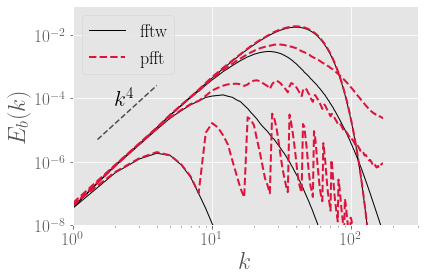

In [23]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
t = [0,4,32,299]
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]

    for idx_t in t:
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=lw[idx],ls=ls[idx],label = tags[idx])
        else:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=lw[idx],ls=ls[idx],label ='__nolegend__')

k_slope = np.array([1.5,4])
ax.plot(k_slope,1e-6*np.power(k_slope,4),c='0.3',ls='--')
ax.text(2,6e-5,'$k^{4}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_b(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.set_ylim(1e-8,0.8e-1)
ax.set_xlim(1,300)
ax.legend(fontsize=18)
fig.tight_layout()
fig.savefig('pfft_vs_fftw.pdf',format='pdf')

# High Pm comparison HEL-NONHEL

In [309]:
files = ['H_v0.005/hg.b_1024_0.005_16.spc','NH_v0.005/nhg.b_1024_0.005_16.spc']


Bs, ks, Bks, times, Lbs, viscs, Pms= get_data_dns(files)
idx_sort = np.argsort(Pms)


Bs, ks, Bks, times, Lbs, viscs, Pms,files = arg_sort_dns(Bs,ks,Bks,times,Lbs,viscs, Pms, files, idx_sort)

Pms = [int(Pm) if Pm.is_integer() else Pm for Pm in Pms]

In [311]:
tags = ['hel','nonhel']
ls = ['-','-']
lw = ['0.8','1.5']
colors= ['k','crimson']


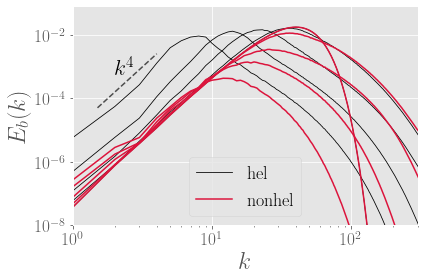

In [312]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
t = [0,4,32,128,480]
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]

    for idx_t in t:
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=lw[idx],ls=ls[idx],label = tags[idx])
        else:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=lw[idx],ls=ls[idx],label ='__nolegend__')

k_slope = np.array([1.5,4])
ax.plot(k_slope,1e-5*np.power(k_slope,4),c='0.3',ls='--')
ax.text(2,6e-4,'$k^{4}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_b(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.set_ylim(1e-8,0.8e-1)
ax.set_xlim(1,300)
ax.legend(fontsize=18)
fig.tight_layout()
#fig.savefig('bleh.pdf',format='pdf')

hel case 	 p = 0.73 	 q = 0.49
nonhel case 	 p = 1.45 	 q = 0.37


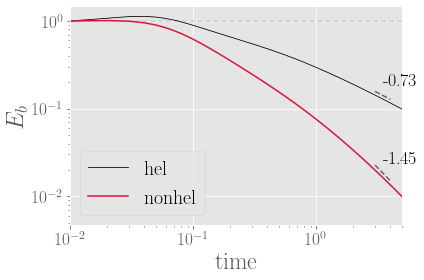

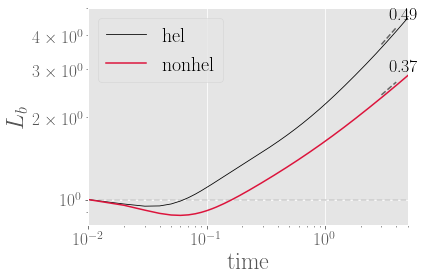

In [318]:
plt.style.use('ggplot')

fig, axE = plt.subplots()
figL, axL = plt.subplots()

p = []
q = []
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[-200:]), np.log(B[-200:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[-200:]), np.log(Lb[-200:]), 1)
    q.append(mq)
    axE.plot(time,B/B[1],colors[idx],lw=lw[idx],label=tags[idx])
    axL.plot(time,Lb/Lb[1],colors[idx],lw=lw[idx],label=tags[idx])
    t_lines = np.array([3,3.5,4])
    
    y = np.power(t_lines,mp)*np.exp(bp)/B[1]*1.1
    axE.plot(t_lines,y,ls='--',c='0.4')
    axE.text(t_lines[1],y[1]*1.3,'{:.2f}'.format(mp),size=18)
    y = np.power(t_lines,mq)*np.exp(bq)/Lb[1]*1.03
    axL.plot(t_lines,y,ls='--',c='0.4')
    axL.text(t_lines[1],y[1]*1.15,'{:.2f}'.format(mq),size=18)
   
  
    print('{} case \t p = {:.2f} \t q = {:.2f}'.format(tags[idx],-mp,mq))
    

p = np.array(p)
q = np.array(q)

axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$E_{b}$',size = 24)
axE.set_xlabel('time',size = 24)
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}$',size = 24)
axL.set_xlabel('time',size = 24)
axE.legend(fontsize=20,loc=3)
axL.legend(fontsize=20,loc=2)
x_lims = ax.get_xlim()
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axE.set_xlim(1e-2,5)
axL.set_xlim(1e-2,5)
fig.tight_layout()
#fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

# Low Prandtl number comparison HEL-NONHEL

In [75]:
f_dns_hel = 'helical_runs/dhff.b_1024_0.005_0.0625.spc'
f_dns = 'dnff.b_1024_0.005_0.0625.spc'
#f_edqnm = 'dnff_edqnm.u_192_0.005.spc'
E_dns = col_B(f_dns)
#E_edqnm = ed.col_B(f_edqnm)
E_dns_hel = col_B(f_dns_hel)
L_dns = col_L(f_dns)
L_dns_hel = col_L(f_dns_hel)
#L_edqnm = ed.col_L(f_edqnm)
dt_dns = get_dt(f_dns)
dt_dns_hel = get_dt(f_dns_hel)
Ntimesteps_dns = int((get_final_time(f_dns) - get_initial_time(f_dns))/dt_dns)
Ntimesteps_dns_hel = int((get_final_time(f_dns_hel) - get_initial_time(f_dns_hel))/dt_dns_hel)
t_dns = [round(i*dt_dns,2) for i in range(Ntimesteps_dns+1)]
t_dns_hel = [round(i*dt_dns_hel,2) for i in range(Ntimesteps_dns_hel+1)]
#t_edqnm = ed.col_t(f_edqnm)

plt.style.use('ggplot')
figE, axE = plt.subplots()
figL, axL = plt.subplots()

mp, bp = np.polyfit(np.log(t_dns[10:]), np.log(E_dns[10:]), 1)
p_dns = mp
mq, bq = np.polyfit(np.log(t_dns[100:]), np.log(L_dns[100:]), 1)
q_dns = mq

#mp, bp = np.polyfit(np.log(t_edqnm[10:400]), np.log(E_edqnm[10:400]), 1)
#p_edqnm = mp
#mq, bq = np.polyfit(np.log(t_edqnm[100:400]), np.log(L_edqnm[100:400]), 1)
#q_edqnm = mq

mph, bph = np.polyfit(np.log(t_dns_hel[10:]), np.log(E_dns_hel[10:]), 1)
ph = mph
mqh, bqh = np.polyfit(np.log(t_dns_hel[100:]), np.log(L_dns_hel[100:]), 1)
qh = mqh
    
axE.plot(t_dns_hel,E_dns_hel/E_dns_hel[1],linestyle = '-',lw=4,c='goldenrod',label = 'DNS hel')
axE.plot(t_dns,E_dns/E_dns[1],linestyle = '-',c='steelblue',label = 'DNS nonh')
#axE.plot(t_edqnm,E_edqnm/(E_edqnm[1]),linestyle = '--',c='crimson',label = 'EDQNM')

axE.set_xlabel('$t$',size=24)
xlims = axE.get_xlim()
axE.hlines(1,xlims[0],xlims[1],colors='0.7',ls = '--')
axE.plot(t_lines,np.power(t_lines,ph)*np.exp(bph)/E_dns_hel[1]*1.8,ls='--',c='0.4')
axE.text(1,1e-4,'$t^{-2.6}$',size= 20)
axE.set_xscale('log')
axE.set_yscale('log')
axE.set_xlim((0.01,4))
axE.set_ylim((1e-6,1.5))
axL.plot(t_dns_hel,L_dns_hel/L_dns_hel[1],linestyle = '-', lw=4, c='goldenrod',label = 'DNS hel')
axL.plot(t_dns,L_dns/L_dns[1],linestyle = '-',c='steelblue',label = 'DNS nonh')
#axL.plot(t_edqnm,L_edqnm/L_edqnm[1],linestyle = '--',c='crimson',label = 'EDQNM')
axL.plot(t_lines,np.power(t_lines,q_dns)*np.exp(bq)/L_dns[1]*0.9,ls='--',c='0.4')
axL.text(1,2.2,'$t^{0.45}$',size= 20)


#axL.plot(t_edqnm,L_edqnm2,linestyle = '-',c='g',label = 'EDQNM2')
axL.set_xlabel('$t$',size=24)

xlims = axL.get_xlim()
#ax[idx].hlines(1,xlims[0],xlims[1],colors='0.7',ls = '--')
axL.hlines(1,xlims[0],xlims[1]+100,colors='0.7',ls = '--')
#ax1.text(1.5,1.175,'$\\nu= 0.0001$')
#ax[idx].legend()
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_xlim(0.01,4)
axL.set_ylim(0.9,5.5)
axE.set_ylabel('$E_b(t)/E_b(t=0)$',size=24)
axL.set_ylabel('$L_b(t)/L_b(t=0)$',size=24)
axE.legend()
axL.legend()

print('ph = ',ph)
print('qh = ',qh) 

print('p_nh = ',p_dns)
print('q_nh = ',q_dns) 

#print(p_edqnm)
#print(q_edqnm) 


figE.tight_layout()
figE.savefig('comparison_lowPm_E.pdf',format='pdf')
figL.tight_layout()
figL.savefig('comparison_lowPm_L.pdf',format='pdf')
plt.show()

In [334]:
files = ['H_v0.005/hc.b_512_0.005_0.25.spc','NH_v0.005/nhc.b_512_0.005_0.25.spc']


Bs, ks, Bks, times, Lbs, viscs, Pms= get_data_dns(files)
idx_sort = np.argsort(Pms)


Bs, ks, Bks, times, Lbs, viscs, Pms,files = arg_sort_dns(Bs,ks,Bks,times,Lbs,viscs, Pms, files, idx_sort)

Pms = [int(Pm) if Pm.is_integer() else Pm for Pm in Pms]
files

array(['H_v0.005/hc.b_512_0.005_0.25.spc',
       'NH_v0.005/nhc.b_512_0.005_0.25.spc'], dtype='<U34')

In [335]:
tags = ['hel','nonhel']
ls = ['-','-']
lw = ['0.8','1.5']
colors= ['k','crimson']


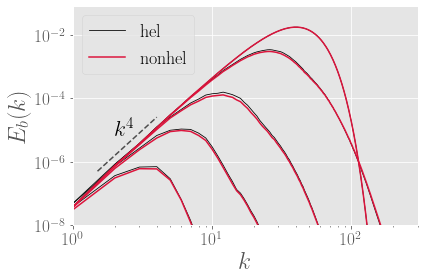

In [346]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
t = [0,4,32,128,480]
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]

    for idx_t in t:
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=lw[idx],ls=ls[idx],label = tags[idx])
        else:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=lw[idx],ls=ls[idx],label ='__nolegend__')

k_slope = np.array([1.5,4])
ax.plot(k_slope,1e-7*np.power(k_slope,4),c='0.3',ls='--')
ax.text(2,7e-6,'$k^{4}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_b(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.set_ylim(1e-8,0.8e-1)
ax.set_xlim(1,300)
ax.legend(fontsize=18)
fig.tight_layout()
#fig.savefig('bleh.pdf',format='pdf')

hel case 	 p = 2.58 	 q = 0.47
nonhel case 	 p = 2.59 	 q = 0.47


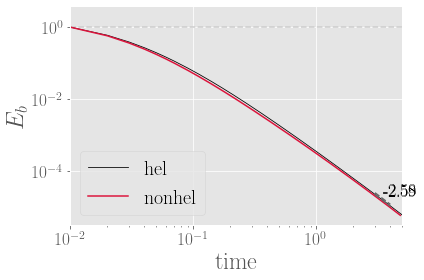

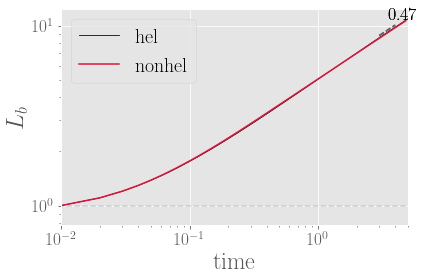

In [347]:
plt.style.use('ggplot')

fig, axE = plt.subplots()
figL, axL = plt.subplots()

p = []
q = []
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[-200:]), np.log(B[-200:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[-200:]), np.log(Lb[-200:]), 1)
    q.append(mq)
    axE.plot(time,B/B[1],colors[idx],lw=lw[idx],label=tags[idx])
    axL.plot(time,Lb/Lb[1],colors[idx],lw=lw[idx],label=tags[idx])
    t_lines = np.array([3,3.5,4])
    
    y = np.power(t_lines,mp)*np.exp(bp)/B[1]*1.1
    axE.plot(t_lines,y,ls='--',c='0.4')
    axE.text(t_lines[1],y[1]*1.3,'{:.2f}'.format(mp),size=18)
    y = np.power(t_lines,mq)*np.exp(bq)/Lb[1]*1.03
    axL.plot(t_lines,y,ls='--',c='0.4')
    axL.text(t_lines[1],y[1]*1.15,'{:.2f}'.format(mq),size=18)
   
  
    print('{} case \t p = {:.2f} \t q = {:.2f}'.format(tags[idx],-mp,mq))
    

p = np.array(p)
q = np.array(q)

axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$E_{b}$',size = 24)
axE.set_xlabel('time',size = 24)
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}$',size = 24)
axL.set_xlabel('time',size = 24)
axE.legend(fontsize=20,loc=3)
axL.legend(fontsize=20,loc=2)
x_lims = ax.get_xlim()
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axE.set_xlim(1e-2,5)
axL.set_xlim(1e-2,5)
fig.tight_layout()
#fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

# Compare Eu HD vs. Eu MHD_hel vs Eu MHD_nonhel

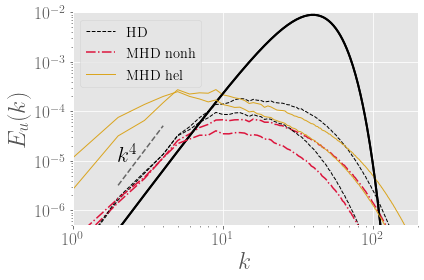

In [358]:
Eks_hydro = E_spectrum('HYDRO/dnl_hydro.u_1024_0.0003125.spc')
Eks_mhd = E_spectrum('NH_v0.0003125/nhd_up.u_1024_0.0003125_1.spc')
Eks_mhd_hel = E_spectrum('H_v0.0003125/hd_up.u_1024_0.0003125_1.spc')
plt.style.use('ggplot')
fig, ax = plt.subplots()
k = np.arange(1,341,1)
N = len(Eks_hydro)
t = [200,380]
#t = 1]
for idx_t in t:
    if idx_t == 200 :
        lab_hd = 'HD'
        lab_mhd = 'MHD nonh'
        lab_mhd2 = 'MHD hel'
    else:
        lab_hd = '__nolegend__'
        lab_mhd = '__nolegend__'
        lab_mhd2 = '__nolegend__'
   
    ax.plot(k,Eks_mhd_hel[0]/2,lw = 2,c='k')
    ax.plot(k,Eks_hydro[idx_t],lw=1,ls = '--', c='k',label = lab_hd)
    ax.plot(k,Eks_mhd[idx_t]/2,ls = '-.',c='crimson',label = lab_mhd)
    ax.plot(k,Eks_mhd_hel[idx_t]/2,lw = 1,c='goldenrod',label = lab_mhd2)
    
k_slope = np.array([2,4])
ax.plot(k_slope,2e-7*np.power(k_slope,4),c='0.4',ls='--')
ax.text(2,1e-5,'$k^{4}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_u(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.legend()
ax.set_ylim(5e-7,1e-2)
ax.set_xlim(1,200)
fig.tight_layout()
#fig.savefig('comparison_HD_MHD_hel_nonh.pdf',format='pdf')



In [359]:
f_hyd = 'HYDRO/dnl_hydro.u_1024_0.0003125.spc'
f_mhd = 'NH_v0.0003125/nhd_up.u_1024_0.0003125_1.spc'
f_mhd_hel = 'H_v0.0003125/hd_up.u_1024_0.0003125_1.spc'
E_hyd = col_Ehyd(f_hyd)
E_mhd= col_E(f_mhd)
E_mhd_hel = col_E(f_mhd_hel)
L_hyd = col_Lhyd(f_hyd)
L_mhd = col_L(f_mhd)
L_mhd_hel = col_L(f_mhd_hel)

dt_hyd = get_dt(f_hyd)
Ntimesteps_hyd = int((get_final_time(f_hyd) - get_initial_time(f_hyd))/dt_hyd)
t_hyd = [round(i*dt_hyd,2) for i in range(Ntimesteps_hyd+1)]

dt_mhd = get_dt(f_mhd)
Ntimesteps_mhd = int((get_final_time(f_mhd) - get_initial_time(f_mhd))/dt_mhd)
t_mhd = [round(i*dt_mhd,2) for i in range(Ntimesteps_mhd+1)]

dt_mhd_hel = get_dt(f_mhd_hel)
Ntimesteps_mhd_hel = int((get_final_time(f_mhd_hel) - get_initial_time(f_mhd_hel))/dt_mhd_hel)
t_mhd_hel = [round(i*dt_mhd_hel,2) for i in range(Ntimesteps_mhd_hel+1)]

p_hyd = -1.55
q_hyd = 0.46
p_mhd = -1.39
q_mhd = 0.41
p_mhd_hel = -0.72
q_mhd_hel = 0.56


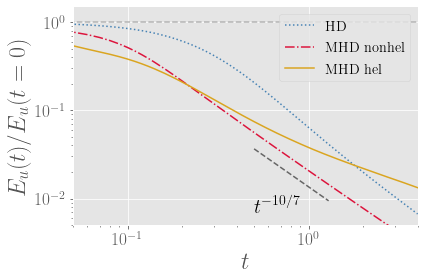

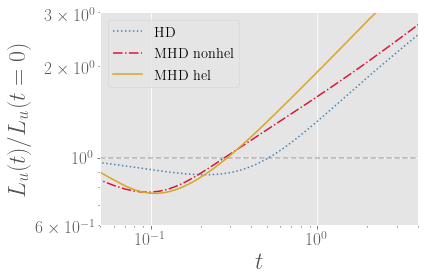

In [368]:
plt.style.use('ggplot')
figE, axE = plt.subplots()
figL, axL = plt.subplots()

mp, bp = np.polyfit(np.log(t_hyd[250:]), np.log(E_hyd[250:]), 1)
p_hyd = mp
mq, bq = np.polyfit(np.log(t_hyd[250:]), np.log(L_hyd[250:]), 1)
q_hyd = mq

mp, bp = np.polyfit(np.log(t_mhd[250:]), np.log(E_mhd[250:]), 1)
p_mhd = mp
mq, bq = np.polyfit(np.log(t_mhd[250:]), np.log(L_mhd[250:]), 1)
q_mhd = mq

mp, bp = np.polyfit(np.log(t_mhd_hel[250:]), np.log(E_mhd_hel[250:]), 1)
p_mhd_hel = mp
mq, bq = np.polyfit(np.log(t_mhd_hel[250:]), np.log(L_mhd_hel[250:]), 1)
q_mhd_hel = mq




axE.plot(t_hyd,E_hyd/E_hyd[1],linestyle = ':',c='steelblue',label = 'HD')
axE.plot(t_mhd,E_mhd/(E_mhd[1]),linestyle = '-.',c='crimson',label = 'MHD nonhel')
axE.plot(t_mhd_hel,E_mhd_hel/(E_mhd_hel[1]),linestyle = '-',c='goldenrod',label = 'MHD hel')

axE.plot(t_hyd[50:130],np.power(t_hyd[50:130],-10/7)*np.exp(bp)*2e-1/E_hyd[1],ls='--',c='0.4')
axE.text(0.5,7e-3,'$t^{-10/7}$',size= 20)


axE.set_xlabel('$t$',size=24)
xlims = axE.get_xlim()
axE.hlines(1,xlims[0],xlims[1],colors='0.7',ls = '--')
axE.set_xscale('log')
axE.set_yscale('log')
axE.set_xlim((0.05,4))
axE.set_ylim((5e-3,1.5))




axL.plot(t_hyd,L_hyd/L_hyd[1],linestyle = ':',c='steelblue',label = 'HD')
axL.plot(t_mhd,L_mhd/L_mhd[1],linestyle = '-.',c='crimson',label = 'MHD nonhel')
axL.plot(t_mhd_hel,L_mhd_hel/L_mhd_hel[1],linestyle = '-',c='goldenrod',label = 'MHD hel')
#axL.plot(t_hyd[60:300],np.power(t_hyd[60:300],2/7)*np.exp(bq)*0.7/L_hyd[1],ls='--',c='0.4')
#axL.text(1.5,1,'$t^{2/7}$',size= 20)
axL.set_xlabel('$t$',size=24)
    

xlims = axL.get_xlim()
#ax[idx].hlines(1,xlims[0],xlims[1],colors='0.7',ls = '--')
axL.hlines(1,xlims[0],xlims[1]+100,colors='0.7',ls = '--')
#ax1.text(1.5,1.175,'$\\nu= 0.0001$')
#ax[idx].legend()
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_xlim(0.05,4)
axL.set_ylim(0.6,3)
axE.set_ylabel('$E_u(t)/E_u(t=0)$',size=24)
axL.set_ylabel('$L_u(t)/L_u(t=0)$',size=24)
axE.legend()
axL.legend()

print('p_hyd = {:.2f}'.format(p_hyd))
print('q_hyd = {:.2f}'.format(q_hyd)) 

print('p_mhd = {:.2f}'.format(p_mhd))
print('q_mhd = {:.2f}'.format(q_mhd))

print('p_mhd_hel = {:.2f}'.format(p_mhd_hel))
print('q_mhd_hel = {:.2f}'.format(q_mhd_hel))


figE.tight_layout()
#figE.savefig('hydro_mhd_mhdhel_E.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('hydro_mhd_mhdhel_L.pdf',format='pdf')
plt.show()


# Have to compare magnetic and kinetic decay for several cases in the same plot. Schekochichin mentions that studies found that magnetic decay is always shallower than kinetic M ~ t**-4/7 < t**-2/3 and  K ~ t**-5/7> t**-2/3

In [448]:
def Lkol(eps,visc):
    return np.power((visc**3)/(eps),1/4)

Pm = 1
visc = 0.0009
N = 512
kmax = int(N/3)-1
print('k_max = ',kmax)
print('Pm = ',Pm)
print('$visc = $', visc)
eta = visc/Pm
Lkol(0.1,eta) * kmax

k_max =  169
Pm =  1
$visc = $ 0.0009


1.5615956361381984

In [396]:
0.75/1000


0.00075

# Iterate over many cases 

In [203]:
f_DNS = glob('NH/*.b*.spc')
Bs, ks, Bks, times, Lbs, viscs, Pms= get_data_dns(f_DNS)
idx_sort = np.argsort(Pms)
Bs, ks, Bks, times, Lbs, viscs, Pms,f_DNS = arg_sort_dns(Bs,ks,Bks,times,Lbs,viscs, Pms,f_DNS, idx_sort)
p = []
q = []
for idx, f in enumerate(f_DNS):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    mp, bp = np.polyfit(np.log(np.array(time[-100:])), np.log(B[-100:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(np.array(time[-100:])), np.log(Lb[-100:]), 1)
    q.append(mq)
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))

Pm = 0.0625 	 p = 0.28 	 q = 0.05
Pm = 0.25 	 p = 0.17 	 q = 0.03
Pm = 1.0 	 p = 0.14 	 q = 0.03
Pm = 16.0 	 p = 0.06 	 q = 0.02


nonhelical
Pm = 0.0625 	 p = 2.88 	 q = 0.55
Pm = 0.25 	 p = 2.59 	 q = 0.47
Pm = 1.0 	 p = 2.24 	 q = 0.45
Pm = 16.0 	 p = 1.41 	 q = 0.37
helical
Pm = 0.0625 	 p = 2.83 	 q = 0.55
Pm = 0.25 	 p = 2.58 	 q = 0.47
Pm = 1.0 	 p = 2.31 	 q = 0.43
Pm = 16.0 	 p = 0.73 	 q = 0.49


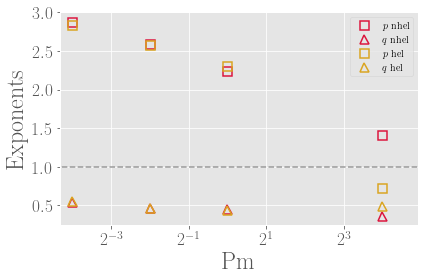

In [383]:
plt.style.use('ggplot')

fig, ax = plt.subplots()

ti = 300
tf = -1

f_DNS = glob('NH_v0.005/*.b*.spc')
Bs, ks, Bks, times, Lbs, viscs, Pms= get_data_dns(f_DNS)
idx_sort = np.argsort(Pms)
Bs, ks, Bks, times, Lbs, viscs, Pms, f_DNS= arg_sort_dns(Bs,ks,Bks,times,Lbs,viscs, Pms, f_DNS,idx_sort)
p = []
q = []
print('nonhelical')
for idx, f in enumerate(f_DNS):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    q.append(mq)
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))
    

p = np.array(p)
q = np.array(q)
#ax.plot(Pms, -p/2 + q,marker = 'D',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'y',label = '$p/2+q$, $n=4$')
ax.plot(Pms, -p,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'crimson',label='{:<}    {:>}'.format('$p$', 'nhel'))
ax.plot(Pms, q,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'crimson',label = '{:<}    {:>}'.format('$q$','nhel'))

f_DNS = glob('H_v0.005/*.b*.spc')
Bs, ks, Bks, times, Lbs, viscs, Pms= get_data_dns(f_DNS)
idx_sort = np.argsort(Pms)
Bs, ks, Bks, times, Lbs, viscs, Pms, f_DNS= arg_sort_dns(Bs,ks,Bks,times,Lbs,viscs, Pms, f_DNS,idx_sort)
p = []
q = []
print('helical')
for idx, f in enumerate(f_DNS):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[ti:]), np.log(B[ti:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:]), np.log(Lb[ti:]), 1)
    q.append(mq)
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))
    

p = np.array(p)
q = np.array(q)
#ax.plot(Pms, -p/2 + q,marker = 'D',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'y',label = '$p/2+q$, $n=4$')
ax.plot(Pms, -p,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'goldenrod',label='{:<}    {:>}'.format('$p$', 'hel'))
ax.plot(Pms, q,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'goldenrod',label = '{:<}    {:>}'.format('$q$','hel'))



ax.set_xscale('log',basex=2)
ax.set_ylabel('Exponents',size = 24)
ax.set_xlabel('Pm',size = 24)
ax.legend(fontsize=10)
x_lims = ax.get_xlim()
ax.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
ax.set_xlim(5e-2,30)
fig.tight_layout()
#fig.savefig('scalings_comparison_DNS_EDQNM.pdf',format='pdf')
plt.show()





Pm = 0.25 	 p = 2.56 	 q = 0.47
Pm = 1.0 	 p = 2.25 	 q = 0.43
Pm = 16.0 	 p = 0.72 	 q = 0.48


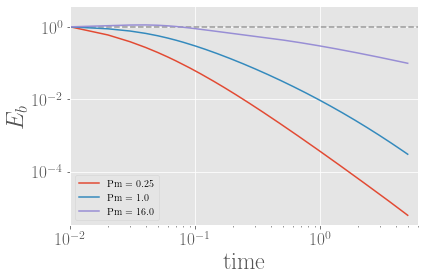

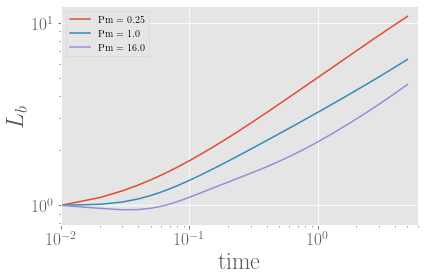

In [330]:
plt.style.use('ggplot')

fig, ax = plt.subplots()
figL, axL = plt.subplots()
ti=200
tf=-1
Bs, ks, Bks, times, Lbs, viscs, Pms = get_data_dns(f_DNS)
idx_sort = np.argsort(Pms)
Bs, ks, Bks, times, Lbs, viscs, Pms,f_DNS = arg_sort_dns(Bs,ks,Bks,times,Lbs,viscs, Pms, f_DNS,idx_sort)
p = []
q = []
for idx, f in enumerate(f_DNS):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    q.append(mq)
    ax.plot(time,B/B[1],label='Pm = {}'.format(Pm))
    axL.plot(time,Lb/Lb[1],label='Pm = {}'.format(Pm))
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))
    

p = np.array(p)
q = np.array(q)
#ax.plot(Pms, -p/2 + q,marker = 'D',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'y',label = '$p/2+q$, $n=4$')
#ax.plot(Pms, -p/2,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'crimson',label='{:<}    {:>}'.format('$p/2$', 'DNS'))
#ax.plot(Pms, q,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'crimson',label = '{:<}    {:>}'.format('$q$','DNS'))



ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('$E_{b}$',size = 24)
ax.set_xlabel('time',size = 24)
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}$',size = 24)
axL.set_xlabel('time',size = 24)
ax.legend(fontsize=10)
axL.legend(fontsize=10)
x_lims = ax.get_xlim()
ax.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
ax.set_xlim(1e-2,6)
axL.set_xlim(1e-2,6)
fig.tight_layout()
fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

In [372]:
f_DNS = glob('NH_v0.005/*.b_*.spc')

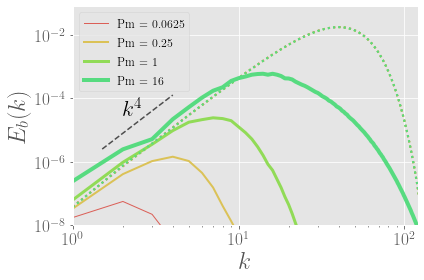

In [373]:
Bs, ks, Bks, times, Lbs, viscs, Pms= get_data_dns(f_DNS)
idx_sort = np.argsort(Pms)
Bs, ks, Bks, times, Lbs, viscs, Pms,f_DNS = arg_sort_dns(Bs,ks,Bks,times,Lbs,viscs, Pms,f_DNS, idx_sort)
Pms = [int(Pm) if Pm.is_integer() else Pm for Pm in Pms]

lws = np.linspace(1,4,len(f_DNS))

plt.style.use('ggplot')
fig, ax = plt.subplots()
t = [0,339]
colors = sns.color_palette('hls',8)

for idx, f in enumerate(f_DNS):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]

    


    for idx_t in t:
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=2,ls=':',label ='__nolegend__')
        else:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw = lws[idx],label = 'Pm = {}'.format(Pm))
k_slope = np.array([1.5,4])
ax.plot(k_slope,5e-7*np.power(k_slope,4),c='0.3',ls='--')
ax.text(2,3e-5,'$k^{4}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_b(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.set_ylim(1e-8,0.8e-1)
ax.set_xlim(1,120)
ax.legend(fontsize=12)
fig.tight_layout()
#fig.savefig('bleh.pdf',format='pdf')

In [389]:
f_DNS = glob('NH_r0.0003125/*.b_*spc')

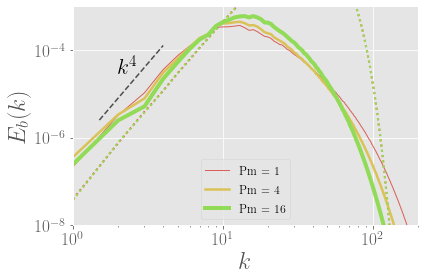

In [394]:
Bs, ks, Bks, times, Lbs, viscs, Pms= get_data_dns(f_DNS)
idx_sort = np.argsort(Pms)
Bs, ks, Bks, times, Lbs, viscs, Pms,f_DNS = arg_sort_dns(Bs,ks,Bks,times,Lbs,viscs, Pms,f_DNS, idx_sort)
Pms = [int(Pm) if Pm.is_integer() else Pm for Pm in Pms]

lws = np.linspace(1,4,len(f_DNS))

plt.style.use('ggplot')
fig, ax = plt.subplots()
t = [0,339]
colors = sns.color_palette('hls',8)

for idx, f in enumerate(f_DNS):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    visc = viscs[idx]
    


    for idx_t in t:
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=2,ls=':',label ='__nolegend__')
        else:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw = lws[idx],label = 'Pm = {}'.format(Pm))
k_slope = np.array([1.5,4])
ax.plot(k_slope,5e-7*np.power(k_slope,4),c='0.3',ls='--')
ax.text(2,3e-5,'$k^{4}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_b(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.set_ylim(1e-8,1e-3)
ax.set_xlim(1,200)
ax.legend(fontsize=12)
fig.tight_layout()
#fig.savefig('bleh.pdf',format='pdf')

Pm = 1.0 	 p = 1.37 	 q = 0.41
Pm = 4.0 	 p = 1.35 	 q = 0.39
Pm = 16.0 	 p = 1.37 	 q = 0.36


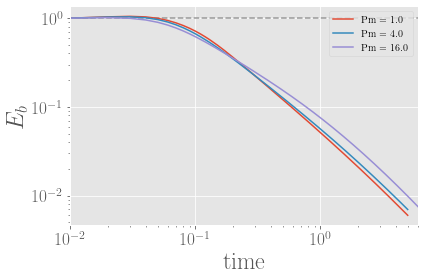

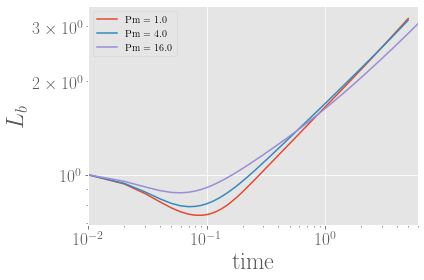

In [391]:
plt.style.use('ggplot')

fig, ax = plt.subplots()
figL, axL = plt.subplots()
ti=200
tf=-1
Bs, ks, Bks, times, Lbs, viscs, Pms = get_data_dns(f_DNS)
idx_sort = np.argsort(Pms)
Bs, ks, Bks, times, Lbs, viscs, Pms,f_DNS = arg_sort_dns(Bs,ks,Bks,times,Lbs,viscs, Pms, f_DNS,idx_sort)
p = []
q = []
for idx, f in enumerate(f_DNS):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    q.append(mq)
    ax.plot(time,B/B[1],label='Pm = {}'.format(Pm))
    axL.plot(time,Lb/Lb[1],label='Pm = {}'.format(Pm))
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))
    

p = np.array(p)
q = np.array(q)
#ax.plot(Pms, -p/2 + q,marker = 'D',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'y',label = '$p/2+q$, $n=4$')
#ax.plot(Pms, -p/2,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'crimson',label='{:<}    {:>}'.format('$p/2$', 'DNS'))
#ax.plot(Pms, q,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'crimson',label = '{:<}    {:>}'.format('$q$','DNS'))



ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('$E_{b}$',size = 24)
ax.set_xlabel('time',size = 24)
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}$',size = 24)
axL.set_xlabel('time',size = 24)
ax.legend(fontsize=10)
axL.legend(fontsize=10)
x_lims = ax.get_xlim()
ax.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
ax.set_xlim(1e-2,6)
axL.set_xlim(1e-2,6)
fig.tight_layout()
#fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()